In [192]:
import sys
from loguru import logger

from src.entity import Entity, EntityFactory, Loan, BankAccount, Stock, RealEstate
from src.cashflow import CashFlow
from src.balance import Balance
from src.simulation import Simulation

In [193]:
%reload_ext autoreload
%autoreload 2

In [212]:
# Entities
bank_account = BankAccount(name='Bank Account', 
                           amount=250_000, 
                           annual_inflation_rate=0, 
                           start_date='2023-09-01')

triplex = RealEstate(name='Triplex',
                     amount=500_000, 
                     cashdown=200_000, 
                     annual_expected_return=5,
                     acquisition_costs=[
                         Entity(name='Inspection', amount=-1200, end_date='2023-12-01'),
                         Entity(name='Notary', amount=-1200, end_date='2023-12-01'),
                         Entity(name='Moving', amount=-1200, end_date='2023-12-01'),
                         Entity(name='Welcome Taxe', amount=-12_000, end_date='2023-12-01'),
                         Entity(name='Renovations', amount=-12_000, end_date='2023-12-01'),
                         Entity(name='Cashdown', amount=-200_000, end_date='2023-12-01'),
                     ],
                     loan=Loan(
                         name='Triplex Loan', 
                         amount=300_000, 
                         annual_interest_rate=3, 
                         term_in_year=25, 
                         annual_inflation_rate=0,
                         start_date='2023-12-01'),
                     start_date='2023-12-01'
                     )

In [213]:
# Budget

# Income
salary = Entity(name='Salary', amount=10_000, annual_inflation_rate=4, start_date='2023-10-01')

# Expenses
rent = Entity(name='Rent', amount=-1200, annual_inflation_rate=4, start_date='2023-10-01')
food = Entity(name='Food', amount=-500, annual_inflation_rate=4, start_date='2023-10-01')
transport = Entity(name='Transport', amount=-200, annual_inflation_rate=4, start_date='2023-10-01')
entertainment = Entity(name='Entertainment', amount=-300, annual_inflation_rate=4, start_date='2023-10-01')

entities = [salary, rent, food, transport, entertainment, bank_account, triplex]

In [214]:
# Cashflow
cashflow = CashFlow()

In [215]:
for entity in entities:
    cashflow.add_entity(entity)
    
cashflow.entities

{'Salary': <src.entity.Entity at 0x1276cc8e0>,
 'Rent': <src.entity.Entity at 0x1276cc160>,
 'Food': <src.entity.Entity at 0x1276cc910>,
 'Transport': <src.entity.Entity at 0x1276cc340>,
 'Entertainment': <src.entity.Entity at 0x1276cc9a0>,
 'Bank Account': <src.entity.BankAccount at 0x1276d6b50>,
 'Triplex': <src.entity.RealEstate at 0x1276d6850>}

In [216]:
cashflow.calculate_monthly_cash_flow('2024-01-01')

6455.626347315852

In [217]:
bank_account.amount

250000

In [218]:
bank_account.update(start_date='2023-12-01', amount=-11)
bank_account.amount

-11


249989

In [219]:
cashflow.calculate_monthly_cash_flow('2024-04-01')

6534.671850668457

In [220]:
# Balance
balance = Balance()

for entity in entities:
    balance.add_entity(entity)

In [221]:
balance.entities

{'Salary': <src.entity.Entity at 0x1276cc8e0>,
 'Rent': <src.entity.Entity at 0x1276cc160>,
 'Food': <src.entity.Entity at 0x1276cc910>,
 'Transport': <src.entity.Entity at 0x1276cc340>,
 'Entertainment': <src.entity.Entity at 0x1276cc9a0>,
 'Bank Account': <src.entity.BankAccount at 0x1276d6b50>,
 'Triplex': <src.entity.RealEstate at 0x1276d6850>}

In [222]:
simulation = Simulation(start_date='2023-11-01', duration=12, cashflow=cashflow, balance=balance)

In [223]:
simulation.run()

2023-11-01
7826.000000000001
249989
7826.000000000001
2023-12-01
-221170.54727490636
7826.000000000001
-221170.54727490636
2024-01-01
6455.626347315852
-213344.54727490636
6455.626347315852
2024-02-01
6481.88721494548
-206888.92092759052
6481.88721494548
2024-03-01
6508.235618800543
-200407.03371264503
6508.235618800543
2024-04-01
6534.671850668457
-193898.7980938445
6534.671850668457
2024-05-01
6561.196203309262
-187364.12624317603
6561.196203309262
2024-06-01
6587.808970458869
-180802.93003986677
6587.808970458869
2024-07-01
6614.510446832308
-174215.1210694079
6614.510446832308
2024-08-01
6641.300928126995
-167600.6106225756
6641.300928126995
2024-09-01
6668.180711025998
-160959.3096944486
6668.180711025998
2024-10-01
6695.15009320133
-154291.1289834226
6695.15009320133


,cashflow,net_worth
2023-11-01,7826.000000,7826.000000
2023-12-01,-221170.547275,-5492.460608
2024-01-01,6455.626347,3745.306636
2024-02-01,6481.887215,13019.784134
2024-03-01,6508.235619,22331.100085
2024-04-01,6534.671851,31679.383144
2024-05-01,6561.196203,41064.762420
2024-06-01,6587.808970,50487.367479
2024-07-01,6614.510447,59947.328348
2024-08-01,6641.300928,69444.775513


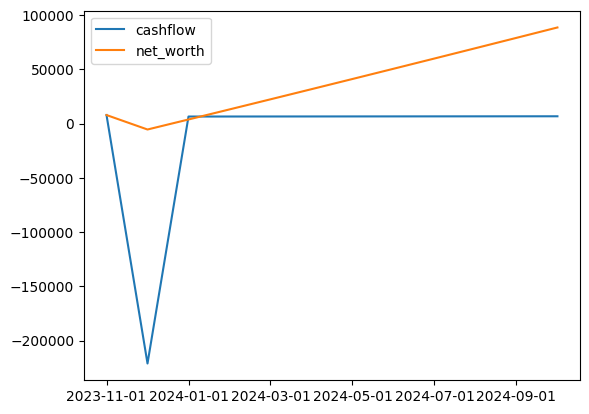

In [224]:
simulation.plot()